<a href="https://colab.research.google.com/github/Josss4141/git-test/blob/master/Sem_6_TE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTELIGENCIA ARTIFICIAL CON PYTHON SEMANA 3:**
*Regresión Multivariable*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Tecnologias Emergentes/Spotify TE.xlsx"
raw_data=pd.read_excel(path,sheet_name="Lince")
dataset=raw_data.copy()
dataset.head(7)


,Streams,Popularidad,Seguidores,Duración,Ingresos
0,8000000,85,12000000,3.5,32000
1,12000000,90,15000000,4.2,48000
2,5000000,70,5000000,3.0,20000
3,20000000,95,20000000,4.5,80000
4,1500000,60,3000000,2.8,6000
5,9500000,80,8000000,3.8,37000
6,3000000,65,2500000,3.2,12000


In [ ]:
data_train=dataset.sample(frac=0.8,random_state=0)
data_test=dataset.drop(data_train.index)

print("Data de entrenamiento: \n",data_train)
print("Data de testeo: \n",data_test)

Data de entrenamiento: 
      Streams  Popularidad  Seguidores  Duración  Ingresos
29   1200000           54     1800000       3.0      4000
20   8000000           79     9000000       4.0     32000
16  11000000           88    14000000       4.0     45000
28  13000000           87    15500000       4.0     54000
22  23000000           97    21500000       5.0     92000
15   9000000           82    13000000       4.0     36000
10   4000000           68     4000000       3.1     16000
2    5000000           70     5000000       3.0     20000
11  22000000           96    21000000       4.6     88000
27   6500000           73     5800000       3.0     26000
25   5000000           69     4500000       3.0     20000
34  16000000           91    16500000       4.0     64000
32  21000000           96    20000000       5.0     88000
26  19000000           94    18500000       5.0     76000
30  10500000           86    14500000       4.0     48000
8    7000000           77     6000000       3.6

In [ ]:
#Entradas de entrenamiento -> data_train
#Salidas de entrenamiento -> train_outputs
train_outputs=data_train.pop("Ingresos")

#Entradas de testeo -> data_test
#Salidas de testeo -> test_outputs
test_outputs=data_test.pop("Ingresos")

In [ ]:
print("Entradas de entrenamiento:\n",data_train)
print("Salidas de entrenamiento:\n",train_outputs)

Entradas de entrenamiento:
      Streams  Popularidad  Seguidores  Duración
29   1200000           54     1800000       3.0
20   8000000           79     9000000       4.0
16  11000000           88    14000000       4.0
28  13000000           87    15500000       4.0
22  23000000           97    21500000       5.0
15   9000000           82    13000000       4.0
10   4000000           68     4000000       3.1
2    5000000           70     5000000       3.0
11  22000000           96    21000000       4.6
27   6500000           73     5800000       3.0
25   5000000           69     4500000       3.0
34  16000000           91    16500000       4.0
32  21000000           96    20000000       5.0
26  19000000           94    18500000       5.0
30  10500000           86    14500000       4.0
8    7000000           77     6000000       3.6
13  14000000           88    16000000       4.0
5    9500000           80     8000000       3.8
17   6000000           72     6000000       3.0
14   1000000

In [ ]:
train_stats=data_train.describe()
train_stats=train_stats.transpose()
print(train_stats)

             count          mean           std        min         25%  \
Streams       28.0  9.917857e+06  6.444926e+06  1000000.0  5000000.00   
Popularidad   28.0  7.914286e+01  1.268628e+01       54.0       69.75   
Seguidores    28.0  1.042500e+07  6.490770e+06  1800000.0  4875000.00   
Duración      28.0  3.735714e+00  6.695572e-01        2.8        3.00   

                   50%         75%         max  
Streams      8500000.0  14250000.0  23000000.0  
Popularidad       79.5        90.0        97.0  
Seguidores   8500000.0  16000000.0  21500000.0  
Duración           4.0         4.0         5.0  


In [ ]:
def escala(x):
  return (x-train_stats["mean"])/train_stats["std"]

train_inputs=escala(data_train)
test_inputs=escala(data_test)

print(data_train)
print(train_inputs)
#print(data_test)
#print(test_inputs)

     Streams  Popularidad  Seguidores  Duración
29   1200000           54     1800000       3.0
20   8000000           79     9000000       4.0
16  11000000           88    14000000       4.0
28  13000000           87    15500000       4.0
22  23000000           97    21500000       5.0
15   9000000           82    13000000       4.0
10   4000000           68     4000000       3.1
2    5000000           70     5000000       3.0
11  22000000           96    21000000       4.6
27   6500000           73     5800000       3.0
25   5000000           69     4500000       3.0
34  16000000           91    16500000       4.0
32  21000000           96    20000000       5.0
26  19000000           94    18500000       5.0
30  10500000           86    14500000       4.0
8    7000000           77     6000000       3.6
13  14000000           88    16000000       4.0
5    9500000           80     8000000       3.8
17   6000000           72     6000000       3.0
14   1000000           55     2000000   

In [ ]:
#Modelo con redes neuronales

# Update input shape to 4 to match the training data features
modelo = keras.Sequential([
    keras.Input(shape=(4,)), # Set input shape to 4
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])


from tensorflow.keras import backend as K

def rmse(y_true,y_pred):
  return K.sqrt(K.mean(K.square(tf.cast(y_true, tf.float32)-tf.cast(y_pred, tf.float32))))  #K.sqrt(...): le saca la raíz cuadrada para volver a la escala original./K.mean(...): saca el promedio de todos los errores./K.square(...): eleva al cuadrado el error./y_true - y_pred: calcula el error (la diferencia entre lo real y lo predicho).

#loss= "mae","mse"
op=tf.keras.optimizers.RMSprop(0.01)
modelo.compile(optimizer=op,loss=["mae"],metrics=[rmse])

print("Model input shape:", modelo.input_shape)

Model input shape: (None, 4)


In [ ]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Shape of train_inputs before fitting:", train_inputs.shape)
history=modelo.fit(train_inputs,train_outputs,epochs=2000,validation_split=0.2)

Shape of train_inputs before fitting: (28, 4)
Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 42454.2656 - rmse: 49942.6992 - val_loss: 30998.9316 - val_rmse: 37567.2852
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 42453.5781 - rmse: 49942.1680 - val_loss: 30998.1719 - val_rmse: 37566.8008
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 42452.8281 - rmse: 49941.5781 - val_loss: 30997.2793 - val_rmse: 37566.2070
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 42451.9336 - rmse: 49940.8516 - val_loss: 30996.2734 - val_rmse: 37565.5508
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 42450.9102 - rmse: 49940.0234 - val_loss: 30995.1465 - val_rmse: 37564.8164
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 42449.7852 - rmse: 49939.1172 - val_loss: 30993.8848 - val_rmse: 37563.9883
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 42448.5312 - rmse: 49938.1172 - val_loss: 30992.4980 - val_rmse: 37563.0781
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'rmse', 'val_loss', 'val_rmse'])


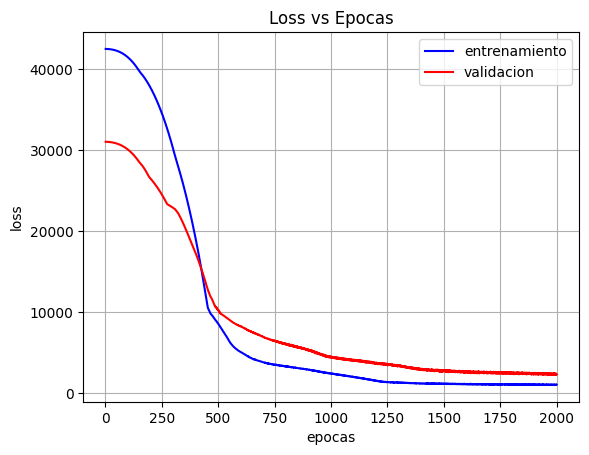

In [ ]:
train_mae=history.history["loss"]
valid_mae=history.history["val_loss"]

epochs=range(1,len(train_mae)+1)

plt.plot(epochs,train_mae,"b-",label="entrenamiento")
plt.plot(epochs,valid_mae,"r-",label="validacion")
plt.legend()  # muestra las etiquetas
plt.xlabel("epocas")
plt.ylabel("loss")
plt.title("Loss vs Epocas")
plt.grid()  # añade cuadrícula para leer mejor
plt.show()

In [ ]:
#Test
print("Entradas: \n",data_test)
print("Salidas Reales: \n",test_outputs)

output_est=modelo.predict(test_inputs)
print("Salidas Estimadas: \n",output_est)

df=pd.DataFrame(output_est)


Entradas: 
      Streams  Popularidad  Seguidores  Duración
0    8000000           85    12000000       3.5
3   20000000           95    20000000       4.5
7   25000000           98    22000000       4.7
9   18000000           92    18000000       4.3
19   2000000           58     2500000       3.0
21   3500000           67     2800000       3.0
33   7000000           78     6000000       4.0
Salidas Reales: 
 0      32000
3      80000
7     100000
9      72000
19      8000
21     14000
33     30000
Name: Ingresos, dtype: int64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Salidas Estimadas: 
 [[35445.613 ]
 [80471.01  ]
 [98196.234 ]
 [71848.49  ]
 [ 7029.0356]
 [16912.875 ]
 [29333.445 ]]


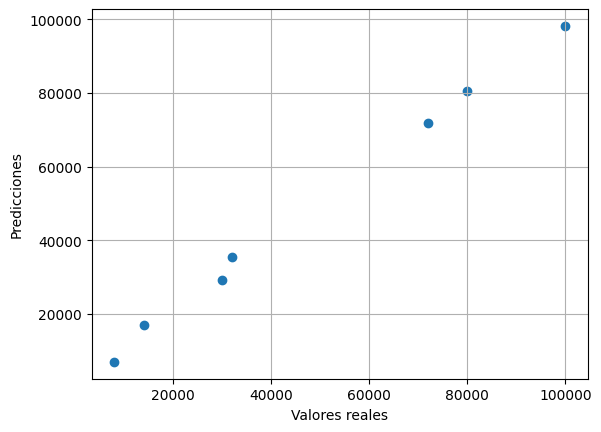

In [ ]:
plt.scatter(test_outputs,output_est)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame({
    "Streams": [12000000, 8000000],
    "Popularidad": [85, 70],
    "Seguidores": [15000000, 10000000],
    "Duración": [3, 4]
})
print("Nuevos datos: \n", df)
x_new = escala(df)
ingresos_pred = modelo.predict(x_new)
print("Predicción de Ingresos ($): \n", ingresos_pred)

Nuevos datos: 
     Streams  Popularidad  Seguidores  Duración
0  12000000           85    15000000         3
1   8000000           70    10000000         4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicción de Ingresos ($): 
 [[44942.137]
 [22134.775]]
